In [2]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 1.0/150.0 MB 1.7 MB/s eta 0:01:26
   ---------------------------------------- 1.3/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 1.6/150.0 MB 1.4 MB/s eta 0:01:49
   ---------------------------------------- 1.8/150.0 MB 1.3 MB/s eta 0:01:51
    --------------------------------------- 2.1/150.0 MB 1.4 MB/s eta 0:01:49
    --------------------------------------- 2.4/150.0 MB 1.4 MB/s eta 0:01:47
    --------------------------------------- 2.6/150.0 MB 1.5 MB/s eta 0:01:42
    --------------------------------------- 3.1/150.0 MB 1.4 MB/s eta 0:01:42
    --------------------------------------- 3.4/150.0 MB 1.5 MB/s eta 0:01:39



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 932.9 kB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 932.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 745.8 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 745.8 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 729.5 kB/s eta 0:00:02
   ---------------------------- ----------- 1.3/1.8 MB 780.2 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 780.2 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 699.0 kB/s eta 0:00:01
   -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable


C:\Users\Mrunal\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:05:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9966490445538658


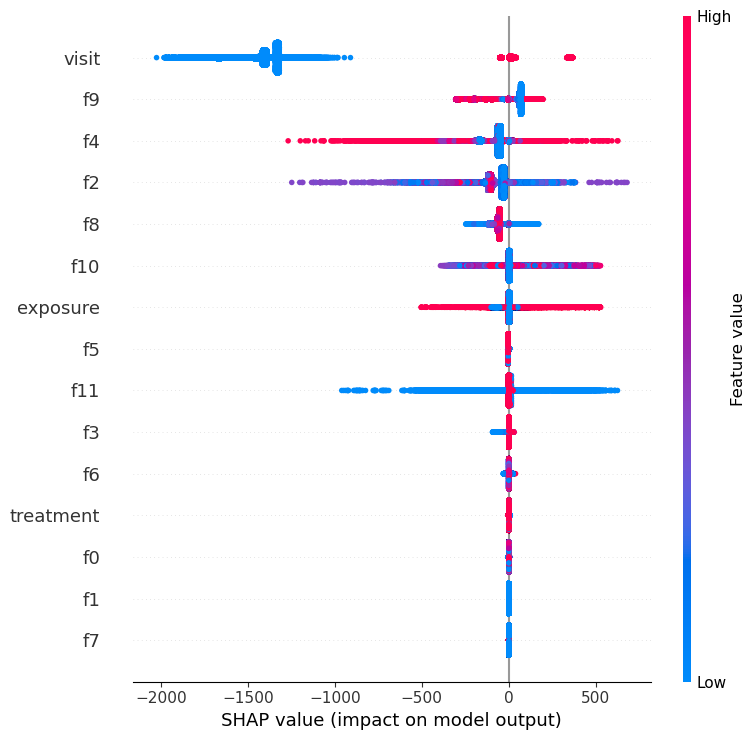

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap

# Load your data
df = pd.read_csv("criteo-uplift-v2.1.csv")

# Define features and target
X = df.drop(columns=["conversion"])        # All input features
y = df["conversion"]                       # Target: did the user convert?

# Optional: Drop columns like 'visit' or 'exposure' if not needed
# X = df.drop(columns=["conversion", "visit", "exposure"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train XGBoost
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Attribution using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot global feature importance
shap.summary_plot(shap_values, X_test)

